# 11장 레이블되지 않은 데이터 다루기: 군집 분석

비지도 학습의 한 분야인 군집 분석을 살펴보곘다. 이 기법을 사용하면 정답을 모르는 데이터 안에서 숨겨진 구조를 찾을 수 있다.

## 11.1 K-평균 알고리즘을 사용하여 유사한 객체 그룹핑

### 11.1.1 사이킷런을 사용한 k-평군 군집

k-평균 알고리즘은 구현하기 매우 쉽고 다른 군집 알고리즘에 비해 계산 효율성이 높기 때문에 인기가 많다.
k-평균 알고리즘은 프로토타입 기반 군집에 속한다. 이외에도 계층적 군집과 밀지도 기반 군집이 있다.

프로토타입 기반 군집은 각 클러스터가 하나의 프로토타입으로 표현된다는 뜻이다. 프로토타입은 연속적인 특성에서는 비슷한 데이터 포인트의 센트로이드(평균) 이거나,
범주형 특성에서는 메도이드(가장 대표되는 포인트나 가장 자주 등장하는 포인트)가 된다. k-평균 알고리즘이 원형 클러스터를 구분하는 데 뛰어나지만,
이 알고리즘이 원형 클러스터를 구분하는 데 뀌어나지만, 이 알고리즘 단점은 사전에 클러스터 개수 K를 지정해야 하는 것이다.

k를 결정하는데 도움이 되는 기법
* elbow method
* silhouette plot

In [9]:
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings(action='ignore')

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

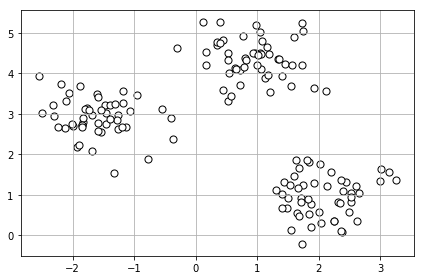

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],
            X[:,1],
            c='white',
            marker='o',
            edgecolors='black',
            s=50)
plt.grid() # 그래프 격자그려주는것
plt.tight_layout()
plt.show()

특성의 유사도에 기초하여 샘플을 그룹으로 모으는 것이다.
이런 문제에 사용할 수 있는 k-평균 알고리즘은 다음 네 단계로 요약된다.

1. 샘플 포인트에서 랜덤하게 k개의 센트로이드를 초기 클러스터 중심으로 선택한다.
2. 각 샘플을 가장 가까운 센트로이드 $u^{(i)}, j \in \{1, \cdots,k \}$에 할당한다.
3. 할당된 샘플들의 중심으로 센트로이드를 이동한다.
4. 클러스터 할당이 변하지 않거나, 사용자가 지정한 허용 호차나 최대 반복 횟수에 도달할 떄까지 단계 2와 3을 반복한다.

연속적인 특성을 가진 샘플을 클러스터로 묶는 데 널리 사용되는 거리는 m-차원 공간에 있는 두 포이트 x와 y 사이의 유크리디안 거리의 제곱이다.

$$d(x,y)^2 = \sum_{j=1}^m(x_j-y_j)^2 = \lVert x-y \rVert_2^2$$

앞의 식에서 j는 샘플 포이트 x와 y의 j번째 차원을 나타낸다.

유클리디안 거리 지표를 기반으로 간단한 최적화 문제로 k-평균 알고리즘을 기술할 수 있다. 클러스터 내 저곱 오차합 또는 클러스터 관성을 반복적으로 최소화하는 방법이다.

$$SSE = \sum_{i=1}^n\sum_{j=1}^k w^{(i,j)} \lVert x^i-u^j \rVert_2^2$$

여기서 $u^i$는 클러스터 j의 대표 포이튼(센트로이드)이다. 샘플 $x^i$가 클러스터 j안에 있다면 $w^{(i,j)} = 1$이고, 아니면 $w^{(i,j)} = 0$이다.

In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

클러스터 개수를 3으로ㅓ 지정했다. 클러스터 개수를 사전에 지정해야 하는 것은 k-평균 알고리즘의 한계 중 하나이다. n_init=10으로
설정하면 k-평균 군집 알고리즘을 각기 다른 랜덤한 샌트로이드에서 독립적으로 열 번 실행하여 가장 낮은 SSE를 만드는 하나를 최종 모델로 선택한다.
max_iter 매개변수는 한 번의 실행에서 수행할 최대 반복 횟수를 지정한다.
사이킷런의 k-평균 규현은 최대 반복 횟수에 도달하기 전에 수렴하면 일찍 종료한다. 수렴에 문제가 있다면 tol 매개변수 값을 느릴는 것이 한가지 밥업이다.

k-평균의 한 가지 문제는 하나 이상의 클러스터가 비어 있을 수 있다는 점이다. 이런 문제는 k-메도이드(k-medoid)나 나중에 설명한 퍼지 c-평균에는 나타나지 않는다
사이킷런의 k-평균에는 이 문제가 고려되어 있다. 한 클러스터가 비어 있다면 알고리즘이 빈 클러스터의 센트로이드에서 가장 멀리 떨어진 샘플을 찾는다 그런 다음 가장 먼 포인트에 센트로이드를 다시 할당한다.

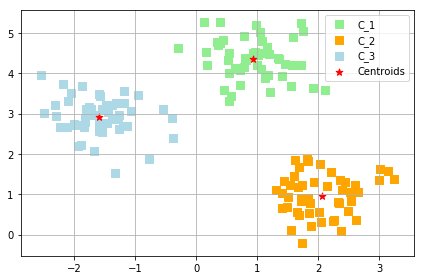

In [12]:
plt.scatter(X[y_km==0, 0],
            X[y_km==0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='C_1')
plt.scatter(X[y_km==1, 0],
            X[y_km==1, 1],
            s=50,
            c='orange',
            marker='s',
            label='C_2')
plt.scatter(X[y_km==2, 0],
            X[y_km==2, 1],
            s=50,
            c='lightblue',
            marker='s',
            label='C_3')
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=50,
            c='red',
            marker='*',
            label='Centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

k-평균이 이런 작은 데이터셋에서 잘 작동하지만 k-평균 알고리즘은 클러스터 개수 k를 사전에 지정해야 하는 중요한 단덤이 있다.
클러스터 개수를 얼마로 선택할지는 실제 애플리케이션에서는 명확하지 않을 수 있다. 특히 시각화할 수 없는 고차원 데이터세에서 그렇다.
k-평균의 다른 특징은 클러스터가 중첩되지 않고 계층적이지 않다는 것이다. 또 각 클러스터에 적어도 하나의 샘플이 있다고 가정한다.

기본 k-평균 알고리즘의 인기 변종인 **k-평균++**fmf dkfdkqhwk

### 11.1.2 k-평균++로 초기 클러스터 센트로이드를 똑똑하게 할당

지금까지 초기 센트로이드를 랜덤하게 할당하는 기본 k-평균 알고리즘을 다루었습니다.
초기 센트로이드가 좋지 않게 선택되면 이따금 나쁜 군집 결과를 만들거나 수렴이 느려진다.
이 문제를 해결하는 한 가지 방법은 같은 데이터셋에서 k-평균 알고리즘을 여러 번 실행하여 SSE 입장에서 가장 성능이 좋은 모델을 선택하는 것이다.
또 다른 방법은 k-평균++ 알고리즘을 통해 초기 센트로이드가 서로 멀리 떨어지도록 위치시키는 것이다.
이는 기본 k-평균보다 일관되고 훌륭한 결과를 만든다. k-평균++의 초기화는 다음과 같이 정리할 수 있다.

1. 선택한 k개의 센트로이드를 저장할 빈 집합 M을 초기화한다.
2. 입력 샘플에서 첫 번째 센트로이드 $u^i$를 랜덤하게 선택하고 M에 할당한다.
3. M에 있지 않은 각 샘플 $x^i$에 대해 M에 있는 센트로이드까지 최소 제곱 거리 $d(x^i, M)^2$을 찾는다.
4. 다음 식과 같은 가중치가 적용된 확률 분포를 사용하여 다음 센트로이드 $u^{p}$를 랜덤하게 선택한다.

$$\frac{d(u^p, M)^2}{\sum_i d(x^i, M)^2}$$

5. k개의 센트로이드를 선택할 때까지 단계 2와 3을 반복한다.
6. 그 다음 기본 k-평균 알고리즘을 수행한다.


사이킷런의 KMeans 클래스로 k-평균++를 사용하려면 init 매개변수를 'k-mean++'로 지정하기만 하면된다.

### 11.1.3 직접 군집 vs 간접 군집

**직접군집**(hard clustering)은 데이터셋의 샘플이 정확히 하나의 클러스터에 할당되는 종류를 말한다.
k-평균 알고리즘이 이에 해당된다. 반대로 **간접 군집**(soft clustering, fuzzy clustering)알고리즘은 샘플을 하나 이상의 클러스터에 할당한다.
간접 군집의 대표적인 예는 **퍼지 C-평균**알고리즘이다.

FCM 처리 단계는 K-평균과 매우 비슷하다. 다만 포잍느가 직접적으로 클러스터에 할당되는 것을 각 클러스터에 속할 확률로 바꾼다.
k-평균에서는 샘플 x의 소속을 이진 희소 벡터로 표현할 수 있다.

$$\begin{bmatrix}u^1 \rightarrow 0 \\ u^2 \rightarrow 1 \\ u^3 \rightarrow 0 \end{bmatrix}$$

여기서 값이 1인 인덱스 위치가 이 샘플이 할당된 클러스터 센트로이드 $u^i$를 나타낸다.($k=3, j\in \{1,2,3\}$이라고 가정하자)
이와 다르게 FCM의 클래스 소속 벡터는 다음과 같이 표현할 수 있다.

$$\begin{bmatrix}u^1 \rightarrow 0.10 \\ u^2 \rightarrow 0.85 \\ u^3 \rightarrow 0.05 \end{bmatrix}$$

여기서 각 값은 [0, 1] 범위 안에 있으며, 각 클러스터 센트로이드의 확률을 나타낸다. 한 샘플에 대한 클래스 소속 확률의 합은 1이다.
k-평균 알고리즘과 비슷하게 FCM 알고리즘은 네 개의 단계로 요약할 수 있다.

1. 센트로이드 개수 k를 지정하고 랜덤하게 각 포인트에 대해 클러스터 확률을 할당한다.
2. 클러스터 센트로이드 $u^i, j\in \{1,2,3\}$를 계산한다.
3. 각 샘플에 대해 클러스터 소속 확률을 업데이트한다.
4. 클러스터 확률이 변하지 않거나 사용자가 지정한 허용 오차나 최대 반복 횟수에 도달할 때까지 단계 2와 3을 반복한다.


FCM의 목적 함수 $J_m $은 k-평균에서 최소화하는 클러스터 내 제곱 오차합과 매우 비슷하다.

$$J_m = \sum_{i=1}^n\sum_{j=1}^k w^{m(i,j)} \lVert x^i - u^i \rVert_2^2$$

클러스터 소속 가중치 $w^{(i, j)}$는 k-평균처림 이진 값($w^{(i,j) \in \{0,1\}}$)이 아니다. 클러스터 소속 확률을 나타내는 실수값 이다.
$w^{(i, j)}$는 추가적인 지수를 포함한다 **퍼지 계수**라고 하는 지수 m은 1보다 크거나 같으며(일반적으로 m=2) 퍼지의 정도를 제어한다. m이
클수록 소속 확률 $w^{(i, j)}$가 작아져 더 복잡한 클러스터를 만든다.
클러스터 소속 확률은 다음과 같이 계산한다.

$$w^{(i,j)} = \Bigg[\sum_{p=1}^k \bigg(\frac{\lVert x^i- u^j \rVert_2}{\lVert x^i- u^p \rVert_2} \bigg)^{\frac{2}{m-1}}\Bigg]^{-1} $$


클러스터 중심 $u^i$는 샘플의 소속 확률 $w^{m(i,j)}$을 가중치로 주어 클러스터에 속한 모든 샘플의 평균으로 계산된다.

$$u^j = \frac{\sum_{i=1}^n w^{m(i,j)}x}{\sum_{i=1}^n w^{m(i,j)}}$$

클러스터 소속 확률을 계산하는 공식을 보면 FCM의 각 반복이 K-평균 보다 비용이 더 많이 든다는 것을 알수 있다. 하지만 FCM은 전형적으로 수렴에 도달하기 까지 반복 횟수가 적게 든다.

실제로는 k-평균과 FCM이 매우 비슷한 군집 결과를 만든다고 알려져 있다.

### 11.1.4 엘보우 방법을 사용하여 최적의 클러스터 개수 찾기

k-평균 군집의 성능을 비교하기 위해 서두에서 언급한 클래스내 SSE를 사용한다.

In [13]:
print('왜곡 : %.2f' % km.inertia_)


왜곡 : 72.48


클래스 내 SSE를 바탕으로 **엘보우 방법**이라 하는 그래프를 사용하여 문제에 최적인 클러스터 개수 k를 추정할 수 있다.
직관적으로 생각했을 때 k가 증가하면 왜곡은 줄어들 것이다. 샘플이 할당된 센트로이드에 더 가까워지기 때문이다. 엘보우 방법 이면에 있는 아이디어는 왜곡이 빠르게 증가하는 지점의 k 값을 찾는 것이다.

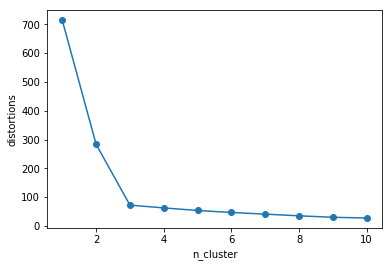

In [16]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('n_cluster')
plt.ylabel('distortions')
plt.show()

### 11.1.5 실루엣 그래프로 군집 품질을 정량화

군집 품질을 평가하는 또 다른 방법은 **실루엣 분석**이다. 이 방법은 k-평균 이외에 다른 군집 알고리즘에도 적용할 수 있다. 실루엣 분석은 클러스터 내 샘플들이 얼마나 조밀하게 모여 있는지를 측정하는 도구 이다
데이터셋 샘플 하나에 대한 **실루엣 계수**를 계산하려면 다음 세 가지 단계를 적용해야한다.

1. 샘플 $x^i$와 동일한 클러스터 내 모든 다른 포이트 사이의 거리를 평균하여 **클러스터 응집력** $a^i$를 계산한다.
2. 샘플 $x^i$와 가장 가까운 클러스터의 모든 샘플 간 평균 거리로 최근접 클러스터의 클러스터 분리도 $b^i$를 계산한다.
3. 클러스터 응집력과 분리도 사이의 차이를 둘 중 큰값으로 나누어 실루엣 $s^i$를 계산한다.

$$s^i = \frac{b^i - a^i}{max\{b^i,a^i\}}$$

실루엣 계수는 -1과 1 사이 값을 가진다. 공식을 보면 클러스터 응집력과 분리도가 같으면 실루엣 계수가 0이 된다. 또 $b^i \gg a^i$이면 이상적인 실루엣 계수 1에 가깝게 된다.
$b^i$는 샘플이 다른 클러스터와 얼마나 다른지 나타내고, $a^i$는 클러스터 내 다른 샘플과 얼마나 비슷한지 나타낸다.

In [23]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
silhouette_vals.shape

(150,)

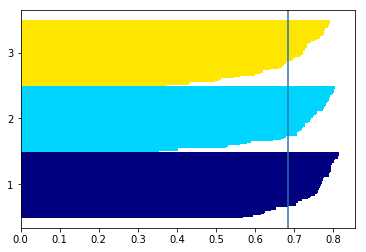

In [29]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals  = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)   # 색표현
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             color=color)
    yticks.append(((y_ax_lower + y_ax_upper)/ 2.))
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(c_silhouette_vals)
plt.axvline(silhouette_avg)
plt.yticks(yticks, cluster_labels + 1)
plt.show()

## 11.2 계층적 트리로 클러스터 조직화

프로토타입 기반 군집의 또 다른 방법인 계층 군집을 알아보겠다. 게층 군집 알고리즘의 한 가지 장점은 **덴드로그램**을 그릴 수 있다는 것이다.
또 다른 당점은 클러스터 개수를 미리 지정할 필요가 없다는 것이다.

계층 군집의 두 가지 방법은 **병함 계층 군집**과 **분할 계층 군집**이다.
분할 군집에서는 전체 샘플을 포함하는 하나의 클러스터에서 시작하여 더 작은 클러스터로 반복적으로 나눈다.

### 11.2.1 상향식으로 클러스터 묶기

병합 계측 군집의 두 가지 기본 알고리즘은 단일 연결과 완전 연결이다. 단일 연결을 사용하면 클러스터 쌍에서 가장 비슷한 샘플 간 거리를 계산한다.
그 다음 이거리가 가장 작은 두 클러스터를 합친다. 완전 연결 방식은 단일 연결과 비슷하지만 클러스터 쌍에서 가장 비슷한 샘플을 비교하는 것이 아니라 가장 비슷하지 않은
샘플을 비교하여 병합을 수행한다.
![](./img/IMG_090020DA40E0-1.jpeg)

병합 계층 군집에서 널리 사용하는 다른 알고리즘은 평균 연결과 와드 연결이다. 평균 연결은 두 클러스터에 있는 모든 샘플 사이의 평균 거리가 가장
작은 클러스터 쌍을 합친다. 와드 연결은 클러스터 내 SSE가 가장 작게 증가하는 두 클러스터를 합친다.

완전 연결 계층 군집 과정
1. 모든 샘플의 거리 행렬을 계산한다.
2. 모든 데이터 포인트를 단일 클러스터로 표현한다.
3. 가장 비슷하지 않은 샘플 사이 거리에 기초하여 가장 가까운 두 클러스터를 합친다.
4. 유사도 행렬을 업데이트한다.
5. 하나의 클러스터가 남을 때까지 단계 2~4를 반복한다.

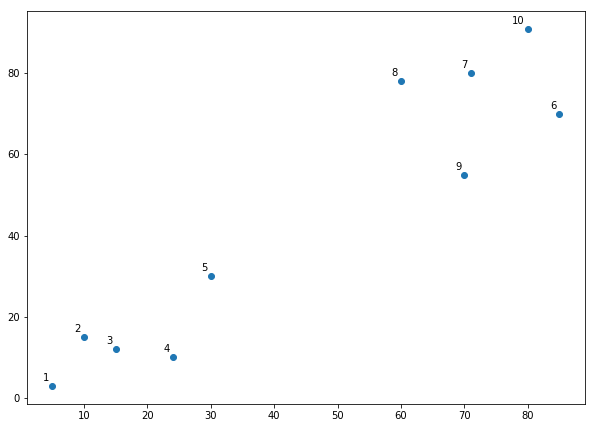

In [30]:
import numpy as np

# 실습데이터 형성
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

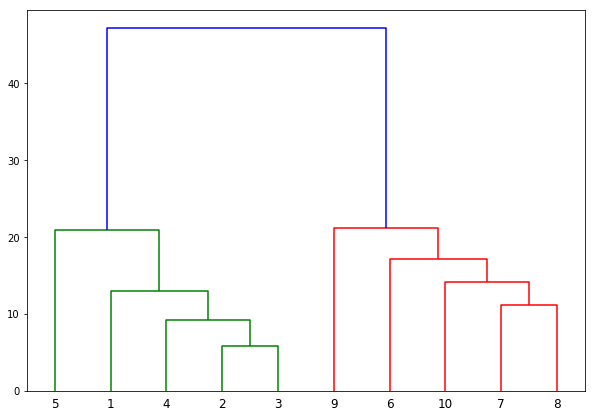

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X, 'single')
labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

## 11.3 DBSCAN을 사용하여 밀집도가 높은 지역 찾기

이 알고리즘은 k-평균처럼 원형 클러스터를 가정하지 않는다. 또 임계치를 수동으로 지정해야 하는 계층적인 방식으로 데이터셋을 나누지 않는다.
이름이 의미하듯이 밀집도 기반 군집 알고리즘은 샘플이 조밀하게 모인 지역에 클러스터 레이블을 할당한다. DBSCAN에서 밀집도란 특정 반경 $\epsilon$
안에 있는 샘플 개수로 정의한다.

DBSCAN 알고리즘에서는 다음 조건에 따라 샘플에 특별한 레이블이 할당된다.
* 어떤 샘플의 특정 반경 $\epsilon$ 안에 있는 이웃 샘플이 지정된 개수(MinPts)이상이면 **핵심 샘플**이 된다.
* $\epsilon$ 이내에 MinPts보다 이수이 적지만 다른 핵심 샘플의 반경 $\epsilon$ 안에 있으면 **경계 샘플**이 된다.
* 핵심 샘플과 경계 샘플이 아닌 다른 모든 샘플은 **잡음 샘플**이 된다.

핵심 샘플, 경계 샘플, 잡음 샘플로 레이블을 할당한 후에는 DBSCAN 알고리즘을 다음 두 단계로 요약할 수 있다.
1. 개별 핵심 샘플이나 ($\epsilon$ 이내에 있는 핵심 샘플을 연결한) 핵심 샘플의 그룹을 클러스터로 만든다
2. 경계 샘플을 해당 핵심 샘플의 클러스터에 할당한다.

![](./img/IMG_B3BB6BDD3DB9-1.jpeg)

DBSCAN의 대표적인 장점 중 하나는 k-평균 처럼 클러스터 모양을 원형으로 가정하지 않는다는 것이다.
또 DBSCAN은 k-평균이나 계층 군집과 달리 모든 샘플을 클러스터에 할당하지 않고 잡은 샘플을 구분하는 능력이 있다.

k-평균, 계층, DBSCAN 비교

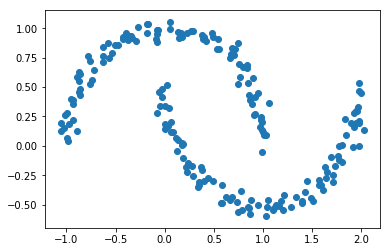

In [36]:
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
X, y = make_moons(n_samples=200,
                  noise=0.05,
                  random_state=3)

plt.scatter(X[:,0], X[:,1]);

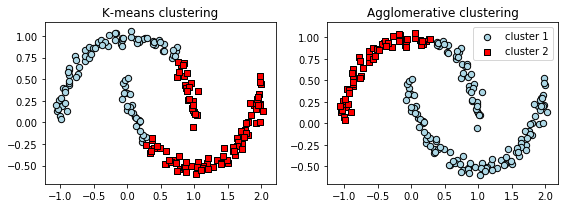

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

군집 결과를 그래프로 나타내면 k-평균이 두 클러스터를 구분할 수 없다는 것이 나타난다. 계층 군집 역시 복잡한 형태를 잘 처리하지 못한다.


DBSCAN 알고리즘 적용

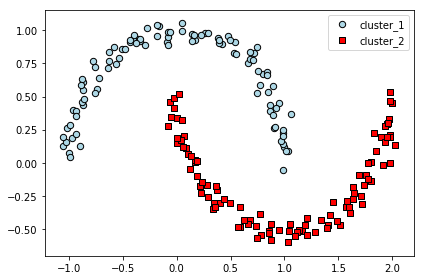

In [38]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')

y_db = db.fit_predict(X)
plt.scatter(X[y_db==0, 0],
            X[y_db==0, 1],
            c='lightblue',
            edgecolors='black',
            marker='o',
            s=40,
            label='cluster_1')
plt.scatter(X[y_db==1, 0],
            X[y_db==1, 1],
            c='red',
            edgecolors='black',
            marker='s',
            s=40,
            label='cluster_2')
plt.legend()
plt.tight_layout()
plt.show()

DBSCAN의 장점 중 하나인 임의 형태의 데이터를 처리할 수 있는 능력을 잘 보여준다.

DBSCAN의 몇몇 단점도 이야기 해보자. 데이터셋에서 훈련 샘플 수가 고정되어 씨다 가정하고, 특성 개수가 늘어나면 차원의 저주로 인한 역효과가 증가한다.
특히 유크리디안 거리 측정을 사용할 때 문제가 된다. **차원의 저주**가 DBSCAN만의 문제는 아니다. 유클리디안 거리 측정을 사용하는 다른 군집 알고리즘에도 영향을 미친다.
DBSCAN이 좋은 군집 결과를 만들려면 두 개의 하이퍼파라미터(MinPts와 $\epsilon$)를 최적화 해야한다.
데이터세에 있는 밀집 영역의 크기가 많이 차이 나면 알맞은 MinPts와 $\epsilon$ 조합 찾는 일이 어렵다.


## 11.4 그래프 기반 군집 - 스펙트럴 군집

스펙트럴 클러스터링은 그래프 기반 클러스터링입니다. 그래프 기반이라는 것은 데이터들 간의 상대적인 관계나 연결을 가장 중요한 정보로 이용하겠다는 뜻입니다.
이것이 바로 가장 잘 알려진 클러스터링 기법 중 하나인 K-평균 클러스터링과의 큰 차이점인데요, K-평균 클러스터링은 유클리디언 공간 위의 데이터의 값들 자체의 거리(유사도)를 기반으로, 군집의 중심을 정하고 그 중심에 가깝게 데이터들을 배정해가는 방식으로 군집을 찾아냅니다. 반면 그래프 기반으로 접근할 경우 데이터들의 절대적 위치가 중요한 것이 아니라 그들이 연결되어 있는지(연결되어 있다면 얼마나 가까이 강하게 연결되어 있는지)를 보고 같은 군집인지 아닌지를 판단하게 됩니다.
각 접근에는 장단이 있을 것이고, 당연히 군집화하고자 하는 데이터가 어떻게 생겼는지에 따라 선택이 달라져야 합니다. 예를 들어 저 맨 위 그림 같은 데이터라면, K-평균보다는 스펙트럴 클러스터링이 우리가 원하는 군집을 찾는 데 적합합니다.


![](https://oopy.lazyrockets.com/api/v2/notion/image?src=https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Feef2dc3d-b01c-4cae-a5b3-fdee7a067244%2F1E1AkY1paiZYAUX6pAAZlPQ.png&blockId=5afc21a8-2955-4124-a618-ee27cc210bf1)

## 11.5 정리

실전에서는 어떤 군집 알고리즘이 주어진 데이터셋에서 최상일지 확실하지 않는다. 특히 시각화 하기 어렵거나 불가능한 고차원 데이터셋일 때 그렇다.
또 성공적은 군집은 알고리즘이나 하이퍼파라미터에만 의존하는 것이 아니라는 점도 강조하고 싶다. 오히려 적절한 거리 지표를 선택하고 실험 환경을 구성하는 데
도움을 줄 수 있는 도메인 지식이 더 중요할 수 있다.

차원의 저주를 고려하면 군집을 수행하기 전에 차원 축소 기법을 적용하는 것이 일반적이다.
